In [6]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

In [2]:
t_step = 1
t_max = 100
t = np.arange(0, t_max, t_step)

In [3]:
flow_rate = 0.1

hole = 0.5
hole_max = 1.0
Ir_hole = 0.1
hole_type_infinite = True

hole_value = 0.0 if hole == 0.0 else 1.0 if hole_type_infinite else hole_max - hole

In [4]:
# We can use dictionary and make these integrated

def ds_dt(inpaths, outpathsnum, s):
    ret = 0.0
    for p in inpaths:
        ret += flow_rate * p
    for i in range(outpathsnum):
        ret -= flow_rate * s
    return ret

def dp_dt(inputs, outputsnum, p, hole_value):
    ret = -1* Ir_hole * hole_value * p
    for s in inputs:
        ret += flow_rate * s
    for i in range(outputsnum):
        ret -= flow_rate * p
    return ret

In [22]:
# ex. 1
init_state_ex1 = [1.0, 0.0, 0.0] # ◯ - ◯

x = np.empty(t_max)
p = np.empty(t_max)
y = np.empty(t_max)
x[0] = init_state_ex1[0]
p[0] = init_state_ex1[1]
y[0] = init_state_ex1[2]

for i in range(0, t_max - 1):
    x[i + 1] = max(x[i] + ds_dt([], 1, x[i]), 0.0)
    p[i + 1] = max(p[i] + dp_dt([x[i]], 1, p[i], hole_value), 0.0)
    y[i + 1] = max(y[i] + ds_dt([p[i]], 0, y[i]), 0.0)

hole_value:  1.0


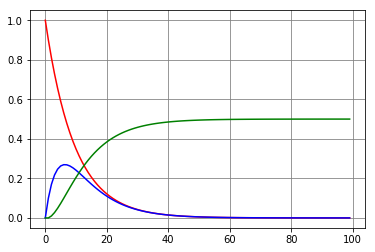

In [23]:
plt.plot(t, x, label='x', color='red')
plt.plot(t, p, label='p', color='blue')
plt.plot(t, y, label='y', color='green')
plt.grid(which='major',color='gray',linestyle='-')
print("hole_value: ", hole_value)

In [24]:
# ex. 2
init_state_ex1 = [1.0, 1.0, # ◯ ◯
                                0.0, 0.0, # - -
                                0.0,         # -   -0.5
                                0.0, 0.0, # - -
                                0.0, 0.0] # ◯ ◯

x1 = np.empty(t_max)
x2 = np.empty(t_max)
p1 = np.empty(t_max)
p2 = np.empty(t_max)
p3 = np.empty(t_max)
p4 = np.empty(t_max)
p5 = np.empty(t_max)
y1 = np.empty(t_max)
y2 = np.empty(t_max)
x1[0] = init_state_ex1[0]
x2[0] = init_state_ex1[1]
p1[0] = init_state_ex1[2]
p2[0] = init_state_ex1[3]
p3[0] = init_state_ex1[4]
p4[0] = init_state_ex1[5]
p5[0] = init_state_ex1[6]
y1[0] = init_state_ex1[7]
y2[0] = init_state_ex1[8]

for i in range(0, t_max - 1):
    x1[i + 1] = max(x1[i] + ds_dt([], 1, x1[i]), 0.0)
    x2[i + 1] = max(x2[i] + ds_dt([], 1, x2[i]), 0.0)
    p1[i + 1] = max(p1[i] + dp_dt([x1[i]], 1, p1[i], 0.0), 0.0)
    p2[i + 1] = max(p2[i] + dp_dt([x2[i]], 1, p2[i], 0.0), 0.0)
    p3[i + 1] = max(p3[i] + dp_dt([p1[i], p2[i]], 2, p3[i], hole_value), 0.0)
    p4[i + 1] = max(p4[i] + dp_dt([p3[i]], 1, p4[i], 0.0), 0.0)
    p5[i + 1] = max(p5[i] + dp_dt([p3[i]], 1, p5[i], 0.0), 0.0)
    y1[i + 1] = max(y1[i] + ds_dt([p4[i]], 0, y1[i]), 0.0)
    y2[i + 1] = max(y2[i] + ds_dt([p5[i]], 0, y2[i]), 0.0)

hole_value:  1.0


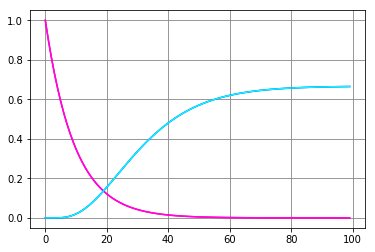

In [25]:
plt.plot(t, x1, label='x1', color='red')
plt.plot(t, x2, label='x2', color='magenta')
plt.plot(t, y1, label='y1', color='blue')
plt.plot(t, y2, label='y2', color='cyan')
plt.grid(which='major',color='gray',linestyle='-')
print("hole_value: ", hole_value)

In [7]:
# ex. 3
init_state_ex3 = [1.0, 1.0, # ◯ ◯
                                0.0,         # -
                                0.0, 0.0, # - -
                                0.0, 0.0] # ◯ ◯

def model(y, t):
    dx1dt = ds_dt([], 1, y[0])
    dx2dt = ds_dt([], 1, y[1])
    dp1dt = dp_dt([y[0], y[1]], 2, y[2], 0.0)
    dp2dt = dp_dt([y[2]], 1, y[3], 0.0)
    dp3dt = dp_dt([y[2]], 1, y[4], hole_value)
    dy1dt = ds_dt([y[3]], 0, y[5])
    dy2dt = ds_dt([y[4]], 0, y[6])
    return [dx1dt, dx2dt, dp1dt, dp2dt, dp3dt, dy1dt, dy2dt]


# Adam: stable and slow
# Runge
result = odeint(model, init_state_ex3, t)

hole_value:  1.0


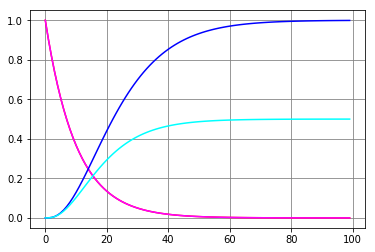

In [9]:
plt.plot(t, result[:,0], label='x1', color='red')
plt.plot(t, result[:,1], label='x2', color='magenta')
plt.plot(t, result[:,5], label='y1', color='blue')
plt.plot(t, result[:,6], label='y2', color='cyan')
plt.grid(which='major',color='gray',linestyle='-')
print("hole_value: ", hole_value)